In [2]:
## Introduction to Scikit-learn ( sklearn )

#This notebook demostrates some of the most useful functions of the most beautiful Scikit-Learn library.

#What we're going to cover:
#0. An end-to-end Scikit-Learn workflow
#1. Getting the data ready
#2. Choose the right estimator/algorithm for our problems
#3. Fit the model/algorithm and use it to make predictions on our data
#4. Evaluating a model
#5. Improve a model
#6. Save and load trained model
#7. Puting it all together!

In [1]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [2]:
heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

In [4]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 1    165
 0    138
 Name: target, dtype: int64)

In [8]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

2. Choose the model and hyperparameters
##### This is often referred to as model or clf (short for classifier) or estimator (as in the Scikit-Learn) documentation.
##### Hyperparameters are like knobs on an oven you can tune to cook your favourite dish.

In [10]:
 #We'll use a Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [11]:
# We'll leave the hyperparameters as default to begin with...
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

3. Fit the model to the data and use it to make a prediction¶

Fitting the model on the data involves passing it the data and asking it to figure out the patterns.

If there are labels (supervised learning), the model tries to work out the relationship between the data and the labels.

If there are no labels (unsupervised learning), the model tries to find patterns and group similar samples together.

In [22]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# This doesn't work... incorrect shapes
y_label = clf.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [14]:
# In order to predict a label, data has to be in the same shape as X_train
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3


In [15]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = clf.predict(X_test)

In [16]:
# Evaluate the model on the training set
clf.score(X_train, y_train)

1.0

In [17]:
# Evaluate the model on the test set
clf.score(X_test, y_test)

0.7763157894736842

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75        32
           1       0.83      0.77      0.80        44

    accuracy                           0.78        76
   macro avg       0.77      0.78      0.77        76
weighted avg       0.78      0.78      0.78        76



In [19]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[25,  7],
       [10, 34]])

In [20]:
accuracy_score(y_test, y_preds)

0.7763157894736842

In [21]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 72.36842105263158%

Trying model with 20 estimators...
Model accuracy on test set: 84.21052631578947%

Trying model with 30 estimators...
Model accuracy on test set: 82.89473684210526%

Trying model with 40 estimators...
Model accuracy on test set: 81.57894736842105%

Trying model with 50 estimators...
Model accuracy on test set: 84.21052631578947%

Trying model with 60 estimators...
Model accuracy on test set: 81.57894736842105%

Trying model with 70 estimators...
Model accuracy on test set: 82.89473684210526%

Trying model with 80 estimators...
Model accuracy on test set: 82.89473684210526%

Trying model with 90 estimators...
Model accuracy on test set: 85.52631578947368%



In [23]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.5 (default, Sep  4 2020, 02:22:02)  [Clang 10.0.0 ]
executable: /Users/acvjetan/opt/miniconda3/envs/crypt0_env/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
          pip: 20.2.4
   setuptools: 50.3.1.post20201107
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.5.2
       Cython: None
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 0.17.0
threadpoolctl: 2.1.0

Built with OpenMP: True


In [25]:
# Standard imports 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels ( usually 'X' and 'y')
    2. Filling ( also called imputing ) or disregarding missing values
    3. Converting non-numerical values to numerical values ( also called feature encoding )

In [26]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X = heart_disease.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [29]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [30]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [33]:
X.shape

(303, 13)

In [34]:
len(heart_disease)

303

### Make sure it's all numerical

In [37]:
car_sales = pd.read_csv('./data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [38]:
len(car_sales)

1000

In [39]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [40]:
# Split into X/y
X = car_sales.drop('Price',axis=1)
y = car_sales["Price"]

# Split into training and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [41]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [46]:
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [47]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [49]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [51]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [52]:
# Let's refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
model.score(X_test,y_test)

0.3235867221569877

### What if there were missing values?

1. Fill them with some value ( also known as imputaton ).
2. Remove the samples with missing data altogether.

In [54]:
# Import car sales missing data
car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [55]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [56]:
# Create X & y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

#### Option 1: Fill missing data with Pandas

In [71]:
# Fill the "Make" column
car_sales_missing["Make"].fillna('missing',inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna('missing',inplace=True)

# Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [74]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [75]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [76]:
len(car_sales_missing)

950

In [77]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [79]:
# Let's try and convert our data to numbers
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-learn

In [81]:
car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [82]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [83]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [84]:
# Split into X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [85]:
# Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and num values with mean
cat_imputer = SimpleImputer(strategy='constant',fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer ( something that fills missing data )
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [86]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make","Colour","Doors","Odometer"])

Make        0
Colour      0
Doors       0
Odometer    0
dtype: int64

In [89]:
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [92]:
# Now we've got our data as numbers and filled ( no missing values )
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

In [93]:
len(car_sales_filled) , len(car_sales)

(950, 1000)

## Choosing the right estimator/algo for our problem

Scikit-learn uses estimator as another term for ML model or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

### Picking a ML model for a regression problem

In [96]:
# Import Boston housing dataset
from sklearn.datasets import load_boston 
boston = load_boston()
boston;

In [98]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])

In [99]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [100]:
boston_df['target'] = pd.Series(boston['target'])

In [101]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [102]:
# How many samples
len(boston_df)

506

In [103]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train,y_train)

# Check the score of the Ridge model on test data
model.score(X_test,y_test)

0.6662221670168518

How do we improve this score?

What if Ridge wasn't working?

In [110]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Ridge model
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

# Check the score of the Ridge model on test data
rf.score(X_test,y_test)

0.8654448653350507

In [108]:
# Check the Ridge model again
model.score(X_test,y_test)

0.6662221670168518

### Choosing an estimator for a classification problem

In [111]:
heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [113]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [117]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target',axis=1)
y = heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instatiate LinearSVC
clf = LinearSVC()
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test,y_test)


/Users/acvjetan/opt/miniconda3/envs/crypt0_env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [115]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [118]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target',axis=1)
y = heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test,y_test)

0.8524590163934426

Tidbit: 
    *If you have structured data, use ensemble methods
    *If you have unstructured data, use deep learning or transfer learning

In [120]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Fit the model/algorithm on our data and use it to make predictions

### Fitting a model to the data

In [ ]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target',axis=1)
y = heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data ( training ML model)
clf.fit(X_train,y_train)

# Evaluate the RandomForestClassifier ( use the patterns the model has learned )
clf.score(X_test,y_test)

In [121]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [122]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Make predictions using a ML model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [123]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,4,3])) # this doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 4. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [124]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [125]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [127]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [128]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [129]:
clf.score(X_test,y_test)

0.8524590163934426

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

 Make predictions with predict_proba()

In [134]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [135]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [136]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models

In [140]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split into training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instatiate and fit model
model = RandomForestRegressor().fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [141]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [142]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [144]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

2.136382352941176

## Evaluating a ML model

Three ways to evaluate scikit laern models / algorithms:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric function

### Evaluating a model with score method

In [146]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

0.8524590163934426

In [148]:
clf.score(X_train,y_train)

1.0

In [147]:
clf.score(X_test,y_test)

0.8524590163934426

In [149]:
# Let's do the same but for regression

In [150]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split into training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instatiate and fit model
model = RandomForestRegressor().fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

In [151]:
model.score(X_test,y_test)

0.8654448653350507

### Evaluating a model using the `scoring` parameter

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train);

In [156]:
clf.score(X_test,y_test)

0.8524590163934426

In [157]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [158]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [162]:
# Default scoring paramteter of classifier = mean accuracy
# clf.score()

In [161]:
# Scoring paramterer set to None by default
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

### Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report


**Accuracy

In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv=5)

In [166]:
np.mean(cross_val_score)

0.8248087431693989

In [168]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the reciever operating charachteristic curve ( AUC / ROC )

* Area under curve ( AUC )
* ROC curve

ROC curves are a comparison of a model's true positive rate ( TPR ) versus a model's false positive rate ( FPR )
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 1 when truth is 1

In [169]:
# Create X_test...
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [171]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilites
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.58, 0.42],
       [0.09, 0.91],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.52, 0.48],
       [0.09, 0.91],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.39, 0.61]])

In [172]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61, 0.84,
       0.77, 0.97, 0.5 , 0.85, 0.08, 0.77, 0.49, 0.05, 0.05, 0.94, 0.85,
       1.  , 0.76, 0.15, 0.28, 0.86, 0.12, 0.68, 0.41, 0.19, 0.14, 0.22,
       0.49, 0.91, 0.96, 0.78, 0.88, 0.2 , 0.97, 0.35, 0.78, 0.88, 0.24,
       0.02, 0.43, 0.03, 0.9 , 0.75, 0.36, 0.42, 0.2 , 0.9 , 0.31, 0.47,
       0.97, 0.67, 0.06, 0.94, 0.06, 0.07])

In [175]:
# Calculate FPR,TPR and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

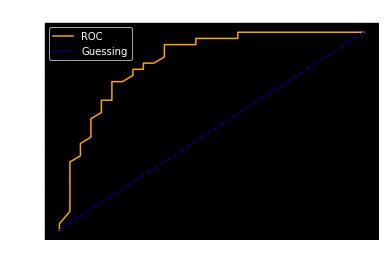

In [177]:
# Create a function for plotting ROC curvers
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate ( fpr )
    and true positive rate ( tpr ) of a model.
    """
    
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    # Plot line with no predictive power ( baseline )
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [178]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8561422413793104

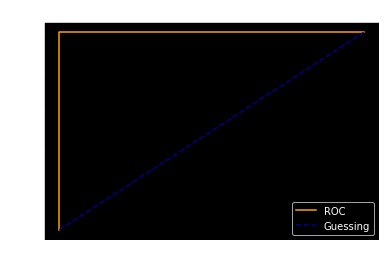

In [179]:
# Plot perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)

plot_roc_curve(fpr,tpr)

In [180]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essensce, giving you an idea of where the model is getting confused

In [182]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 8, 24]])

In [184]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Label"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,8,24


In [185]:
22 + 7 + 8 + 24

61

In [186]:
len(y_preds)

61

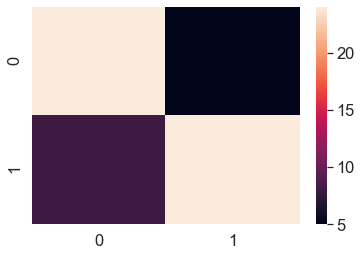

In [189]:
# Make our confusion matrix more visual with Seaborn's heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [193]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

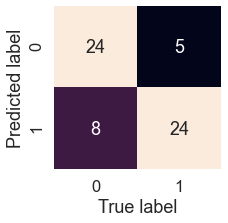

In [194]:
plot_conf_mat(conf_mat)

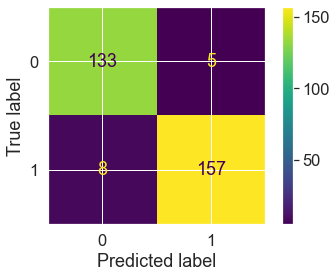

In [196]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X,y);